In [1]:
import pandas as pd
import numpy as np
# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# pip install urduhack

In [6]:
import urduhack
# urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

In [7]:
train_data=pd.read_csv('urdu_tweets.xls')


In [8]:
train_data.head()

,tweets,sentiment
0,ہم مر بھی گئے تو کیا سوگ ہی ہوگا فقط تین دن کا,N
1,وہ لڑکا لڑکی موج میلہ کر رہے تھے ن لیگی میاں ف...,N
2,اسی اینج ڈھولنا جیویں کنجراں دی جوڑی جیویں بلا...,P
3,خاتون کے ساتھ جو واقعہ پیش آیا اس کی ذمہ دار و...,N
4,ریپسٹ نظروں کے سامنے فرار ہوگیا لیکن چوہان جیس...,N


In [14]:
data =  pd.concat([train_data]).reset_index(drop=True)
print(data.shape)

(500, 2)


In [15]:
df =  data.copy()
df

,tweets,sentiment
0,ہم مر بھی گئے تو کیا سوگ ہی ہوگا فقط تین دن کا,N
1,وہ لڑکا لڑکی موج میلہ کر رہے تھے ن لیگی میاں ف...,N
2,اسی اینج ڈھولنا جیویں کنجراں دی جوڑی جیویں بلا...,P
3,خاتون کے ساتھ جو واقعہ پیش آیا اس کی ذمہ دار و...,N
4,ریپسٹ نظروں کے سامنے فرار ہوگیا لیکن چوہان جیس...,N
...,...,...
495,اقرار الحسن صاحب ایک استعفی ادھر بھی ایک دن تک...,N
496,گجرپورہ واقعہ میں ملزم عابد علی پہلے بھی عصمت ...,N
497,کیمرےسےگاڑی کی سپیڈ زیادہ دیکھ کر اسکو جرمانہ ...,N
498,جس سوشل میڈیا کا گلہ گھونٹا جارہا ہے یہ جوابی ...,N


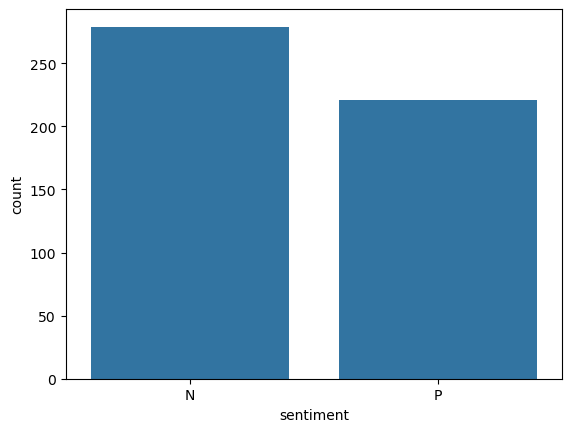

In [16]:
sns.countplot( x = 'sentiment', data = df );

In [17]:
# Encode the labels
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

In [18]:
df['tweets'] = df['tweets'].apply(normalize)

In [19]:
df['tweets'] = df['tweets'].apply(replace_urls)

In [20]:
df['tweets'] = df['tweets'].apply(replace_emails)

In [21]:
df['tweets'] = df['tweets'].apply(replace_currency_symbols)

In [25]:
df['tweets'] = df['tweets'].apply(normalize_whitespace)

In [35]:
# Remove stop words from text
from typing import FrozenSet

In [37]:
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())
def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [39]:
len(STOP_WORDS)

430

In [41]:
df[['tweets']].head(10)

,tweets
0,ہم مر بھی گئے تو کیا سوگ ہی ہوگا فقط تین دن کا
1,وہ لڑکا لڑکی موج میلہ کر رہے تھے ن لیگی میاں ف...
2,اسی اینج ڈھولنا جیویں کنجراں دی جوڑی جیویں بلا...
3,خاتون کے ساتھ جو واقعہ پیش آیا اس کی ذمہ دار و...
4,ریپسٹ نظروں کے سامنے فرار ہوگیا لیکن چوہان جیس...
5,ریاست قانون کی حاکمیت سزا کے خوف کی بنیاد پر چ...
6,جانتا ہوں تیری جلن کا سبب رکھلو برنال اور گزار...
7,خود محافظ بنے اپنے پیاروں کے محتاج ھے ادارے عہ...
8,لاش ملے گی کسی دن ویرانے سے میری میرا قلم ضمیر...
9,اگر ا س وقت ا س لیڈی ڈاکٹر کو انصاف ملتا تو آج...


In [43]:
# from urduhack.models.lemmatizer import lemmatizer
# def lemitizeStr(str):
#     lemme_str = ""
#     temp = lemmatizer.lemma_lookup(str)
#     for t in temp:
#         lemme_str += t[0] + " "

#     return lemme_str

In [45]:
df['tweets'] =  df['tweets'].apply(remove_stopwords)

In [47]:
# df['lemmatized_text'] = df['tweets'].apply(lemitizeStr)

In [ ]:
df['tweets'][2], df['lemmatized_text'][2]

('اینج ڈھولنا جیویں کنجراں جوڑی جیویں بلاول تے مریم جیویں فضلو ٹپوری محبتمافیا',
 'اینج ڈھولنا جیویں کنجراں جوڑی جیویں بلاول تے مریم جیویں فضلو ٹپوری محبتمافیا ')

In [ ]:
df[['tweets', 'lemmatized_text']].head(10)

,tweets,lemmatized_text
0,مر سوگ ہوگا تین دن,مر سوگ ہوگا تین دن
1,لڑکا لڑکی موج میلہ ن لیگی میاں فاروق کےبیٹوں ز...,لڑکا لڑکی موج میلہ ن لیگی میاں فاروق کےبیٹوں ز...
2,اینج ڈھولنا جیویں کنجراں جوڑی جیویں بلاول تے م...,اینج ڈھولنا جیویں کنجراں جوڑی جیویں بلاول تے م...
3,خاتون واقعہ پیش ذمہ دار,خاتون واقعہ پیش ذمہ دار
4,ریپسٹ نظروں فرار ہوگیا چوہان مبارکبادیں مصروف ...,ریپسٹ نظروں فرار ہوگیا چوہان مبارکبادیں مصروف ...
5,ریاست قانون حاکمیت سزا خوف بنیاد چلتی انسان حی...,ریاست قانون حاکمیت سزا خوف بنیاد چلتی انسان حی...
6,جانتا جلن سبب رکھلو برنال گزارا نام شہنشاہ بی ...,جانتا جلن سبب رکھلو برنال گزارا نام شہنشاہ بی ...
7,محافظ بنے پیاروں محتاج ھے ادارے عہدیداروں,محافظ بنے پیاروں محتاج ھے ادارے عہدیداروں
8,لاش ملے دن ویرانے قلم ضمیر فروشوں خلاف لکھتا,لاش ملے دن ویرانے قلم ضمیر فروشوں خلاف لکھتا
9,ا س وقت ا س لیڈی ڈاکٹر انصاف ملتا آج سوچنے جرت...,ا س وقت ا س لیڈی ڈاکٹر انصاف ملتا آج سوچنے جرت...


In [51]:
df.head()

,tweets,sentiment,encoded_sentiments
0,مر سوگ ہوگا تین دن,N,0
1,لڑکا لڑکی موج میلہ ن لیگی میاں فاروق کےبیٹوں ز...,N,0
2,اینج ڈھولنا جیویں کنجراں جوڑی جیویں بلاول تے م...,P,1
3,خاتون واقعہ پیش ذمہ دار,N,0
4,ریپسٹ نظروں فرار ہوگیا چوہان مبارکبادیں مصروف ...,N,0


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size = 0.30, random_state = 7, shuffle = True)

In [51]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (350,)
Shape of X_test (150,)
Shape of Y_train (350,)
Shape of Y_test (150,)


In [53]:
max_feature_num = 500
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [55]:
 #check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((350, 500), (150, 500))

In [57]:
print(train_vecs.shape)  # Check the dimensions of train_vecs
print(test_vecs.shape)  # Check the dimensions of test_vecs

(350, 500)
(150, 500)


# BERT

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
from torch.optim import AdamW
from urduhack.preprocessing import normalize_whitespace, remove_punctuation
from urduhack.tokenization import sentence_tokenizer
import os

# Enable multi-processing
os.environ["TOKENIZERS_PARALLELISM"] = "true"

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_text(texts, max_length=128):
    return tokenizer(
        texts.tolist(),  # Convert pandas Series to list
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Apply text preprocessing
df['preprocessed_text'] = df['tweets'].apply(lambda x: ' '.join(sentence_tokenizer(remove_punctuation(normalize_whitespace(x)))))

# Split the data into features (X) and labels (y)
X = df['preprocessed_text']
y = df['encoded_sentiments']

# Initialize K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
results = []

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Training function
def train_model(model, train_loader, val_loader, optimizer, device, epochs=3):
    model.to(device)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

        # Validation
        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=-1)

                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        # Calculate metrics
        accuracy = accuracy_score(val_labels, val_preds)
        precision = precision_score(val_labels, val_preds)
        recall = recall_score(val_labels, val_preds)
        f1 = f1_score(val_labels, val_preds)

        print(f"Validation Metrics - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

    return val_preds, val_labels

# K-Fold cross-validation loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Tokenize the training and validation data
    X_train_tokens = tokenize_text(X_train)
    X_val_tokens = tokenize_text(X_val)

    # Create custom datasets
    train_dataset = CustomDataset(X_train_tokens, y_train.tolist())
    val_dataset = CustomDataset(X_val_tokens, y_val.tolist())

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    # Load pre-trained BERT model for sequence classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # Set up optimizer
    optimizer = AdamW(model.parameters(), lr=2e-5)

    # Train and evaluate the model
    val_preds, val_labels = train_model(model, train_loader, val_loader, optimizer, device)

    # Calculate metrics for the current fold
    accuracy = accuracy_score(val_labels, val_preds)
    precision = precision_score(val_labels, val_preds)
    recall = recall_score(val_labels, val_preds)
    f1 = f1_score(val_labels, val_preds)

    # Store metrics for the current fold
    results.append({
        'Fold': fold + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

    print(f"Fold {fold + 1} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("-" * 50)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Calculate average metrics across all folds
avg_metrics = pd.DataFrame({
    'Fold': ['Average'],
    'Accuracy': [results_df['Accuracy'].mean()],
    'Precision': [results_df['Precision'].mean()],
    'Recall': [results_df['Recall'].mean()],
    'F1-score': [results_df['F1-score'].mean()]
})

# Append the average metrics to the results table
results_df = pd.concat([results_df, avg_metrics], ignore_index=True)

# Print the results table
print("\nResults Table:")
print(results_df.to_string(index=False))

Fold 1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.6925968313217163


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.57, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 2, Loss: 0.6841730213165284
Validation Metrics - Accuracy: 0.51, Precision: 0.3125, Recall: 0.11627906976744186, F1-score: 0.1694915254237288
Epoch 3, Loss: 0.6862185072898864


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.57, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Fold 1 Metrics:
Accuracy: 0.57
Precision: 0.0
Recall: 0.0
F1-score: 0.0
--------------------------------------------------
Fold 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.6930847811698914
Validation Metrics - Accuracy: 0.41, Precision: 0.41414141414141414, Recall: 0.9761904761904762, F1-score: 0.5815602836879432
Epoch 2, Loss: 0.6981312203407287
Validation Metrics - Accuracy: 0.41, Precision: 0.41414141414141414, Recall: 0.9761904761904762, F1-score: 0.5815602836879432
Epoch 3, Loss: 0.7095088362693787
Validation Metrics - Accuracy: 0.59, Precision: 1.0, Recall: 0.023809523809523808, F1-score: 0.046511627906976744
Fold 2 Metrics:
Accuracy: 0.59
Precision: 1.0
Recall: 0.023809523809523808
F1-score: 0.046511627906976744
--------------------------------------------------
Fold 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.698075110912323


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 2, Loss: 0.6933023858070374


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 3, Loss: 0.6892351078987121


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Fold 3 Metrics:
Accuracy: 0.58
Precision: 0.0
Recall: 0.0
F1-score: 0.0
--------------------------------------------------
Fold 4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.694186134338379
Validation Metrics - Accuracy: 0.5, Precision: 0.625, Recall: 0.09615384615384616, F1-score: 0.16666666666666666
Epoch 2, Loss: 0.6784599471092224


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.48, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 3, Loss: 0.6821369576454163
Validation Metrics - Accuracy: 0.5, Precision: 1.0, Recall: 0.038461538461538464, F1-score: 0.07407407407407407
Fold 4 Metrics:
Accuracy: 0.5
Precision: 1.0
Recall: 0.038461538461538464
F1-score: 0.07407407407407407
--------------------------------------------------
Fold 5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.707787721157074


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 2, Loss: 0.6941043782234192
Validation Metrics - Accuracy: 0.57, Precision: 0.48, Recall: 0.2857142857142857, F1-score: 0.3582089552238806
Epoch 3, Loss: 0.6919429421424865
Validation Metrics - Accuracy: 0.62, Precision: 0.6, Recall: 0.2857142857142857, F1-score: 0.3870967741935484
Fold 5 Metrics:
Accuracy: 0.62
Precision: 0.6
Recall: 0.2857142857142857
F1-score: 0.3870967741935484
--------------------------------------------------

Results Table:
   Fold  Accuracy  Precision   Recall  F1-score
      1     0.570       0.00 0.000000  0.000000
      2     0.590       1.00 0.023810  0.046512
      3     0.580       0.00 0.000000  0.000000
      4     0.500       1.00 0.038462  0.074074
      5     0.620       0.60 0.285714  0.387097
Average     0.572       0.52 0.069597  0.101536


# BERT + smote + TFIDF + kfold

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
from torch.optim import AdamW
from urduhack.preprocessing import normalize_whitespace, remove_punctuation
from urduhack.tokenization import sentence_tokenizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import os

# Enable multi-processing
os.environ["TOKENIZERS_PARALLELISM"] = "true"

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_text(texts, max_length=128):
    return tokenizer(
        texts.tolist(),  # Convert pandas Series to list
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Apply text preprocessing
df['preprocessed_text'] = df['tweets'].apply(lambda x: ' '.join(sentence_tokenizer(remove_punctuation(normalize_whitespace(x)))))

# Split the data into features (X) and labels (y)
X = df['preprocessed_text']
y = df['encoded_sentiments']

# Initialize K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
results = []

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Training function
def train_model(model, train_loader, val_loader, optimizer, device, epochs=3):
    model.to(device)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

        # Validation
        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=-1)

                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        # Calculate metrics
        accuracy = accuracy_score(val_labels, val_preds)
        precision = precision_score(val_labels, val_preds)
        recall = recall_score(val_labels, val_preds)
        f1 = f1_score(val_labels, val_preds)

        print(f"Validation Metrics - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

    return val_preds, val_labels

# K-Fold cross-validation loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Convert text to numerical features using TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_val_tfidf = tfidf.transform(X_val)

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

    # Convert TF-IDF features back to text (for BERT tokenization)
    X_train_res_text = [" ".join([tfidf.get_feature_names_out()[i] for i in doc.nonzero()[1]]) for doc in X_train_res]

    # Tokenize the training and validation data
    X_train_tokens = tokenize_text(pd.Series(X_train_res_text))
    X_val_tokens = tokenize_text(X_val)

    # Create custom datasets
    train_dataset = CustomDataset(X_train_tokens, y_train_res.tolist())
    val_dataset = CustomDataset(X_val_tokens, y_val.tolist())

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    # Load pre-trained BERT model for sequence classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # Set up optimizer with best parameters
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

    # Train and evaluate the model
    val_preds, val_labels = train_model(model, train_loader, val_loader, optimizer, device, epochs=4)

    # Calculate metrics for the current fold
    accuracy = accuracy_score(val_labels, val_preds)
    precision = precision_score(val_labels, val_preds)
    recall = recall_score(val_labels, val_preds)
    f1 = f1_score(val_labels, val_preds)

    # Store metrics for the current fold
    results.append({
        'Fold': fold + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

    print(f"Fold {fold + 1} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("-" * 50)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Calculate average metrics across all folds
avg_metrics = pd.DataFrame({
    'Fold': ['Average'],
    'Accuracy': [results_df['Accuracy'].mean()],
    'Precision': [results_df['Precision'].mean()],
    'Recall': [results_df['Recall'].mean()],
    'F1-score': [results_df['F1-score'].mean()]
})

# Append the average metrics to the results table
results_df = pd.concat([results_df, avg_metrics], ignore_index=True)

# Print the results table
print("\nResults Table:")
print(results_df.to_string(index=False))

Fold 1


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7088723949023655
Validation Metrics - Accuracy: 0.43, Precision: 0.43, Recall: 1.0, F1-score: 0.6013986013986014
Epoch 2, Loss: 0.7014959880283901
Validation Metrics - Accuracy: 0.44, Precision: 0.4329896907216495, Recall: 0.9767441860465116, F1-score: 0.6
Epoch 3, Loss: 0.6926485449075699
Validation Metrics - Accuracy: 0.57, Precision: 0.5, Recall: 0.023255813953488372, F1-score: 0.044444444444444446
Epoch 4, Loss: 0.6934746610266822
Validation Metrics - Accuracy: 0.56, Precision: 0.48936170212765956, Recall: 0.5348837209302325, F1-score: 0.5111111111111111
Fold 1 Metrics:
Accuracy: 0.56
Precision: 0.48936170212765956
Recall: 0.5348837209302325
F1-score: 0.5111111111111111
--------------------------------------------------
Fold 2


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7029674372502736
Validation Metrics - Accuracy: 0.53, Precision: 0.46153846153846156, Recall: 0.7142857142857143, F1-score: 0.5607476635514018
Epoch 2, Loss: 0.6976037387337003
Validation Metrics - Accuracy: 0.58, Precision: 0.5, Recall: 0.5714285714285714, F1-score: 0.5333333333333333
Epoch 3, Loss: 0.6946080092872892


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 4, Loss: 0.6951819849865777
Validation Metrics - Accuracy: 0.67, Precision: 0.8461538461538461, Recall: 0.2619047619047619, F1-score: 0.4
Fold 2 Metrics:
Accuracy: 0.67
Precision: 0.8461538461538461
Recall: 0.2619047619047619
F1-score: 0.4
--------------------------------------------------
Fold 3


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.700781313436372
Validation Metrics - Accuracy: 0.54, Precision: 0.4473684210526316, Recall: 0.40476190476190477, F1-score: 0.425
Epoch 2, Loss: 0.7029080625091281
Validation Metrics - Accuracy: 0.42, Precision: 0.42, Recall: 1.0, F1-score: 0.5915492957746479
Epoch 3, Loss: 0.6933027931622097
Validation Metrics - Accuracy: 0.5, Precision: 0.4473684210526316, Recall: 0.8095238095238095, F1-score: 0.576271186440678
Epoch 4, Loss: 0.7070259813751493


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Fold 3 Metrics:
Accuracy: 0.58
Precision: 0.0
Recall: 0.0
F1-score: 0.0
--------------------------------------------------
Fold 4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7041041254997253
Validation Metrics - Accuracy: 0.47, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 2, Loss: 0.693761944770813


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.48, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 3, Loss: 0.6948937897024483
Validation Metrics - Accuracy: 0.51, Precision: 0.5172413793103449, Recall: 0.8653846153846154, F1-score: 0.6474820143884892
Epoch 4, Loss: 0.6758325469904932


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Validation Metrics - Accuracy: 0.48, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Fold 4 Metrics:
Accuracy: 0.48
Precision: 0.0
Recall: 0.0
F1-score: 0.0
--------------------------------------------------
Fold 5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7107342886073249
Validation Metrics - Accuracy: 0.6, Precision: 0.5833333333333334, Recall: 0.16666666666666666, F1-score: 0.25925925925925924
Epoch 2, Loss: 0.6741787833826882
Validation Metrics - Accuracy: 0.59, Precision: 0.5714285714285714, Recall: 0.09523809523809523, F1-score: 0.16326530612244897
Epoch 3, Loss: 0.6428852421896798
Validation Metrics - Accuracy: 0.55, Precision: 0.47058823529411764, Recall: 0.5714285714285714, F1-score: 0.5161290322580645
Epoch 4, Loss: 0.577810023512159
Validation Metrics - Accuracy: 0.58, Precision: 0.5, Recall: 0.23809523809523808, F1-score: 0.3225806451612903
Fold 5 Metrics:
Accuracy: 0.58
Precision: 0.5
Recall: 0.23809523809523808
F1-score: 0.3225806451612903
--------------------------------------------------

Results Table:
   Fold  Accuracy  Precision   Recall  F1-score
      1     0.560   0.489362 0.534884  0.511111
      2     0.670   0.846154 0.261905  0.400000
      3     0.580   0.000000 0.000000  0.000000
      4     0

# BERT + smote + TFIDF + kfold 10 Epoches 

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
from torch.optim import AdamW
from urduhack.preprocessing import normalize_whitespace, remove_punctuation
from urduhack.tokenization import sentence_tokenizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import os

# Enable multi-processing
os.environ["TOKENIZERS_PARALLELISM"] = "true"

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_text(texts, max_length=128):
    return tokenizer(
        texts.tolist(),  # Convert pandas Series to list
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Apply text preprocessing
df['preprocessed_text'] = df['tweets'].apply(lambda x: ' '.join(sentence_tokenizer(remove_punctuation(normalize_whitespace(x)))))

# Split the data into features (X) and labels (y)
X = df['preprocessed_text']
y = df['encoded_sentiments']

# Initialize K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
results = []

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Training function
def train_model(model, train_loader, val_loader, optimizer, device, epochs=10):
    model.to(device)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

        # Validation
        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=-1)

                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        # Calculate metrics
        accuracy = accuracy_score(val_labels, val_preds)
        precision = precision_score(val_labels, val_preds)
        recall = recall_score(val_labels, val_preds)
        f1 = f1_score(val_labels, val_preds)

        print(f"Validation Metrics - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

    return val_preds, val_labels

# K-Fold cross-validation loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Convert text to numerical features using TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_val_tfidf = tfidf.transform(X_val)

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

    # Convert TF-IDF features back to text (for BERT tokenization)
    X_train_res_text = [" ".join([tfidf.get_feature_names_out()[i] for i in doc.nonzero()[1]]) for doc in X_train_res]

    # Tokenize the training and validation data
    X_train_tokens = tokenize_text(pd.Series(X_train_res_text))
    X_val_tokens = tokenize_text(X_val)

    # Create custom datasets
    train_dataset = CustomDataset(X_train_tokens, y_train_res.tolist())
    val_dataset = CustomDataset(X_val_tokens, y_val.tolist())

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    # Load pre-trained BERT model for sequence classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # Set up optimizer with best parameters
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

    # Train and evaluate the model
    val_preds, val_labels = train_model(model, train_loader, val_loader, optimizer, device, epochs=10)

    # Calculate metrics for the current fold
    accuracy = accuracy_score(val_labels, val_preds)
    precision = precision_score(val_labels, val_preds)
    recall = recall_score(val_labels, val_preds)
    f1 = f1_score(val_labels, val_preds)

    # Store metrics for the current fold
    results.append({
        'Fold': fold + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

    print(f"Fold {fold + 1} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("-" * 50)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Calculate average metrics across all folds
avg_metrics = pd.DataFrame({
    'Fold': ['Average'],
    'Accuracy': [results_df['Accuracy'].mean()],
    'Precision': [results_df['Precision'].mean()],
    'Recall': [results_df['Recall'].mean()],
    'F1-score': [results_df['F1-score'].mean()]
})

# Append the average metrics to the results table
results_df = pd.concat([results_df, avg_metrics], ignore_index=True)

# Print the results table
print("\nResults Table:")
print(results_df.to_string(index=False))

Fold 1


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7106067346675056
Validation Metrics - Accuracy: 0.57, Precision: 0.5, Recall: 0.09302325581395349, F1-score: 0.1568627450980392
Epoch 2, Loss: 0.6995892865317208
Validation Metrics - Accuracy: 0.43, Precision: 0.43, Recall: 1.0, F1-score: 0.6013986013986014
Epoch 3, Loss: 0.6828560914312091
Validation Metrics - Accuracy: 0.43, Precision: 0.40540540540540543, Recall: 0.6976744186046512, F1-score: 0.5128205128205128
Epoch 4, Loss: 0.6943575739860535
Validation Metrics - Accuracy: 0.43, Precision: 0.43, Recall: 1.0, F1-score: 0.6013986013986014
Epoch 5, Loss: 0.6987515730517251


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.57, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 6, Loss: 0.6933649884802955
Validation Metrics - Accuracy: 0.42, Precision: 0.42105263157894735, Recall: 0.9302325581395349, F1-score: 0.5797101449275363
Epoch 7, Loss: 0.690590175134795
Validation Metrics - Accuracy: 0.45, Precision: 0.4166666666666667, Recall: 0.6976744186046512, F1-score: 0.5217391304347826
Epoch 8, Loss: 0.6538669275385993
Validation Metrics - Accuracy: 0.44, Precision: 0.4235294117647059, Recall: 0.8372093023255814, F1-score: 0.5625
Epoch 9, Loss: 0.5841893777251244
Validation Metrics - Accuracy: 0.5, Precision: 0.43137254901960786, Recall: 0.5116279069767442, F1-score: 0.46808510638297873
Epoch 10, Loss: 0.45100588883672443
Validation Metrics - Accuracy: 0.56, Precision: 0.48484848484848486, Recall: 0.37209302325581395, F1-score: 0.42105263157894735
Fold 1 Metrics:
Accuracy: 0.56
Precision: 0.48484848484848486
Recall: 0.37209302325581395
F1-score: 0.42105263157894735
-----------

C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7034754838262286
Validation Metrics - Accuracy: 0.42, Precision: 0.42, Recall: 1.0, F1-score: 0.5915492957746479
Epoch 2, Loss: 0.7088031619787216


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 3, Loss: 0.7106778834547315
Validation Metrics - Accuracy: 0.42, Precision: 0.41836734693877553, Recall: 0.9761904761904762, F1-score: 0.5857142857142857
Epoch 4, Loss: 0.6974053915057864
Validation Metrics - Accuracy: 0.42, Precision: 0.42, Recall: 1.0, F1-score: 0.5915492957746479
Epoch 5, Loss: 0.6986642756632396


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 6, Loss: 0.6913516074419022
Validation Metrics - Accuracy: 0.59, Precision: 0.6666666666666666, Recall: 0.047619047619047616, F1-score: 0.08888888888888889
Epoch 7, Loss: 0.6936284005641937
Validation Metrics - Accuracy: 0.42, Precision: 0.4148936170212766, Recall: 0.9285714285714286, F1-score: 0.5735294117647058
Epoch 8, Loss: 0.704317358987672


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 9, Loss: 0.656814598611423
Validation Metrics - Accuracy: 0.6, Precision: 0.5263157894736842, Recall: 0.47619047619047616, F1-score: 0.5
Epoch 10, Loss: 0.614324155662741
Validation Metrics - Accuracy: 0.61, Precision: 0.5294117647058824, Recall: 0.6428571428571429, F1-score: 0.5806451612903226
Fold 2 Metrics:
Accuracy: 0.61
Precision: 0.5294117647058824
Recall: 0.6428571428571429
F1-score: 0.5806451612903226
--------------------------------------------------
Fold 3


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.6984698793717793


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Metrics - Accuracy: 0.58, Precision: 0.0, Recall: 0.0, F1-score: 0.0
Epoch 2, Loss: 0.6936164391892297
Validation Metrics - Accuracy: 0.41, Precision: 0.40229885057471265, Recall: 0.8333333333333334, F1-score: 0.5426356589147286
Epoch 3, Loss: 0.7020534532410758
Validation Metrics - Accuracy: 0.44, Precision: 0.4186046511627907, Recall: 0.8571428571428571, F1-score: 0.5625
Epoch 4, Loss: 0.6766883432865143
Validation Metrics - Accuracy: 0.58, Precision: 0.5, Recall: 0.5714285714285714, F1-score: 0.5333333333333333
Epoch 5, Loss: 0.6351934884275708
Validation Metrics - Accuracy: 0.58, Precision: 0.5, Recall: 0.16666666666666666, F1-score: 0.25
Epoch 6, Loss: 0.604994613145079
Validation Metrics - Accuracy: 0.55, Precision: 0.44, Recall: 0.2619047619047619, F1-score: 0.3283582089552239
Epoch 7, Loss: 0.5752219312957355
Validation Metrics - Accuracy: 0.52, Precision: 0.4423076923076923, Recall: 0.5476190476190477, F1-score: 0.48936170212765956
Epoch 8, Loss: 0.4393160662480763


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7078336312853056
Validation Metrics - Accuracy: 0.52, Precision: 0.52, Recall: 1.0, F1-score: 0.6842105263157895
Epoch 2, Loss: 0.7021798203731405
Validation Metrics - Accuracy: 0.52, Precision: 0.52, Recall: 1.0, F1-score: 0.6842105263157895
Epoch 3, Loss: 0.6901085541166109
Validation Metrics - Accuracy: 0.48, Precision: 0.5, Recall: 0.038461538461538464, F1-score: 0.07142857142857142
Epoch 4, Loss: 0.6741563595574478
Validation Metrics - Accuracy: 0.49, Precision: 0.5098039215686274, Recall: 0.5, F1-score: 0.5048543689320388
Epoch 5, Loss: 0.665179470489765
Validation Metrics - Accuracy: 0.43, Precision: 0.38095238095238093, Recall: 0.15384615384615385, F1-score: 0.2191780821917808
Epoch 6, Loss: 0.6135766896708258
Validation Metrics - Accuracy: 0.48, Precision: 0.5, Recall: 0.21153846153846154, F1-score: 0.2972972972972973
Epoch 7, Loss: 0.6076372173325769
Validation Metrics - Accuracy: 0.44, Precision: 0.4583333333333333, Recall: 0.4230769230769231, F1-score: 0.44

C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7040570399590901
Validation Metrics - Accuracy: 0.49, Precision: 0.38461538461538464, Recall: 0.35714285714285715, F1-score: 0.37037037037037035
Epoch 2, Loss: 0.7092018148728779
Validation Metrics - Accuracy: 0.56, Precision: 0.45454545454545453, Recall: 0.23809523809523808, F1-score: 0.3125
Epoch 3, Loss: 0.6970307784421104
Validation Metrics - Accuracy: 0.46, Precision: 0.4375, Recall: 1.0, F1-score: 0.6086956521739131
Epoch 4, Loss: 0.6888635413987296
Validation Metrics - Accuracy: 0.57, Precision: 0.45454545454545453, Recall: 0.11904761904761904, F1-score: 0.18867924528301888
Epoch 5, Loss: 0.6702831046921867
Validation Metrics - Accuracy: 0.41, Precision: 0.40860215053763443, Recall: 0.9047619047619048, F1-score: 0.562962962962963
Epoch 6, Loss: 0.6407305938856942
Validation Metrics - Accuracy: 0.48, Precision: 0.4342105263157895, Recall: 0.7857142857142857, F1-score: 0.559322033898305
Epoch 7, Loss: 0.6556683640394892
Validation Metrics - Accuracy: 0.42, Precisi

# BertTokenizer, BertForSequenceClassification,
  #  XLMRobertaTokenizer, XLMRobertaForSequenceClassification,
   # RobertaTokenizer, RobertaForSequenceClassification,

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import (
    BertTokenizer, BertForSequenceClassification,
    XLMRobertaTokenizer, XLMRobertaForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification,
    AdamW, Trainer, TrainingArguments
)
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
from torch.optim import AdamW
from urduhack.preprocessing import normalize_whitespace, remove_punctuation
from urduhack.tokenization import sentence_tokenizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import os

# Enable multi-processing
os.environ["TOKENIZERS_PARALLELISM"] = "true"

# Load dataset
# df = pd.read_csv("your_dataset.csv")  # Replace with "your dataset
df['preprocessed_text'] = df['tweets'].apply(lambda x: ' '.join(sentence_tokenizer(remove_punctuation(normalize_whitespace(x)))))

# Split the data into features (X) and labels (y)
X = df['preprocessed_text']
y = df['encoded_sentiments']

# Initialize K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
results = []

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Function to tokenize text
def tokenize_text(texts, tokenizer, max_length=128):
    return tokenizer(
        texts.tolist(),  # Convert pandas Series to list
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Function to apply SMOTE
def apply_smote(X_train, y_train):
    tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
    X_train_tfidf = tfidf.fit_transform(X_train)
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)
    X_train_res_text = [" ".join([tfidf.get_feature_names_out()[i] for i in doc.nonzero()[1]]) for doc in X_train_res]
    return X_train_res_text, y_train_res

# Function to train and evaluate a model
def train_evaluate_model(model_name, tokenizer, model, X_train, y_train, X_val, y_val, device, epochs=3):
    # Tokenize the training and validation data
    X_train_tokens = tokenize_text(X_train, tokenizer)
    X_val_tokens = tokenize_text(X_val, tokenizer)

    # Create custom datasets
    train_dataset = CustomDataset(X_train_tokens, y_train.tolist())
    val_dataset = CustomDataset(X_val_tokens, y_val.tolist())

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    # Set up optimizer
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

    # Training loop
    model.to(device)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

    # Evaluation
    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)

            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_preds)
    precision = precision_score(val_labels, val_preds)
    recall = recall_score(val_labels, val_preds)
    f1 = f1_score(val_labels, val_preds)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("-" * 50)

    return accuracy, precision, recall, f1

# Define models and tokenizers
models = {
    "mBERT": {
        "tokenizer": BertTokenizer.from_pretrained("bert-base-multilingual-cased"),
        "model": BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
    },
    "XLM-R": {
        "tokenizer": XLMRobertaTokenizer.from_pretrained("xlm-roberta-base"),
        "model": XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=2)
    },
    "RoBERTa": {
        "tokenizer": RobertaTokenizer.from_pretrained("roberta-base"),
        "model": RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
    }
}

# K-Fold cross-validation loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for model_name, config in models.items():
    print(f"Training and evaluating {model_name}...")
    tokenizer = config["tokenizer"]
    model = config["model"]

    fold_results = []
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        print(f"Fold {fold + 1}")

        # Split data into training and validation sets
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Apply SMOTE to balance the classes
        X_train_res_text, y_train_res = apply_smote(X_train, y_train)

        # Train and evaluate the model
        accuracy, precision, recall, f1 = train_evaluate_model(
            model_name, tokenizer, model, pd.Series(X_train_res_text), y_train_res, X_val, y_val, device
        )

        # Store metrics for the current fold
        fold_results.append({
            'Fold': fold + 1,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

    # Convert fold results to a DataFrame
    fold_results_df = pd.DataFrame(fold_results)

    # Calculate average metrics across all folds
    avg_metrics = pd.DataFrame({
        'Fold': ['Average'],
        'Accuracy': [fold_results_df['Accuracy'].mean()],
        'Precision': [fold_results_df['Precision'].mean()],
        'Recall': [fold_results_df['Recall'].mean()],
        'F1-score': [fold_results_df['F1-score'].mean()]
    })

    # Append the average metrics to the results table
    results_df = pd.concat([fold_results_df, avg_metrics], ignore_index=True)

    # Print the results table
    print(f"\nResults for {model_name}:")
    print(results_df.to_string(index=False))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:  34%|###3      | 377M/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

C:\Users\mobee\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mobee\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Training and evaluating mBERT...
Fold 1
Epoch 1, Loss: 0.7217158909354892
Epoch 2, Loss: 0.7017478176525661
Epoch 3, Loss: 0.6847773045301437
mBERT Metrics:
Accuracy: 0.63
Precision: 0.6875
Recall: 0.2558139534883721
F1-score: 0.3728813559322034
--------------------------------------------------
Fold 2


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.704431625349181
Epoch 2, Loss: 0.6724699352468763
Epoch 3, Loss: 0.5888367678437915
mBERT Metrics:
Accuracy: 0.71
Precision: 0.6382978723404256
Recall: 0.7142857142857143
F1-score: 0.6741573033707865
--------------------------------------------------
Fold 3


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.5804342542375837
Epoch 2, Loss: 0.4895209382687296
Epoch 3, Loss: 0.43479585328272413
mBERT Metrics:
Accuracy: 0.43
Precision: 0.42424242424242425
Recall: 1.0
F1-score: 0.5957446808510638
--------------------------------------------------
Fold 4


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.4451654239975173
Epoch 2, Loss: 0.29663075121312305
Epoch 3, Loss: 0.23497098645773426
mBERT Metrics:
Accuracy: 0.62
Precision: 0.5777777777777777
Recall: 1.0
F1-score: 0.7323943661971831
--------------------------------------------------
Fold 5


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.37751477531024386
Epoch 2, Loss: 0.28575286854590687
Epoch 3, Loss: 0.18773888563737273
mBERT Metrics:
Accuracy: 0.91
Precision: 0.8837209302325582
Recall: 0.9047619047619048
F1-score: 0.8941176470588236
--------------------------------------------------

Results for mBERT:
   Fold  Accuracy  Precision   Recall  F1-score
      1      0.63   0.687500 0.255814  0.372881
      2      0.71   0.638298 0.714286  0.674157
      3      0.43   0.424242 1.000000  0.595745
      4      0.62   0.577778 1.000000  0.732394
      5      0.91   0.883721 0.904762  0.894118
Average      0.66   0.642308 0.774972  0.653859
Training and evaluating XLM-R...
Fold 1


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.7030984801905495
Epoch 2, Loss: 0.6993909350463322
Epoch 3, Loss: 0.6923227842364993
XLM-R Metrics:
Accuracy: 0.44
Precision: 0.43434343434343436
Recall: 1.0
F1-score: 0.6056338028169014
--------------------------------------------------
Fold 2


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.7039526722260884
Epoch 2, Loss: 0.6906664222478867
Epoch 3, Loss: 0.6913548473800931
XLM-R Metrics:
Accuracy: 0.64
Precision: 0.6666666666666666
Recall: 0.2857142857142857
F1-score: 0.4
--------------------------------------------------
Fold 3


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.6771849180970874
Epoch 2, Loss: 0.6840702380452838
Epoch 3, Loss: 0.6567603402904102
XLM-R Metrics:
Accuracy: 0.51
Precision: 0.45569620253164556
Recall: 0.8571428571428571
F1-score: 0.5950413223140496
--------------------------------------------------
Fold 4


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.620915242310228
Epoch 2, Loss: 0.5053769791948384
Epoch 3, Loss: 0.42920394241809845
XLM-R Metrics:
Accuracy: 0.72
Precision: 0.7307692307692307
Recall: 0.7307692307692307
F1-score: 0.7307692307692307
--------------------------------------------------
Fold 5


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.4148785578353064
Epoch 2, Loss: 0.35901286719100817
Epoch 3, Loss: 0.2893148123153618
XLM-R Metrics:
Accuracy: 0.84
Precision: 0.8421052631578947
Recall: 0.7619047619047619
F1-score: 0.8
--------------------------------------------------

Results for XLM-R:
   Fold  Accuracy  Precision   Recall  F1-score
      1      0.44   0.434343 1.000000  0.605634
      2      0.64   0.666667 0.285714  0.400000
      3      0.51   0.455696 0.857143  0.595041
      4      0.72   0.730769 0.730769  0.730769
      5      0.84   0.842105 0.761905  0.800000
Average      0.63   0.625916 0.727106  0.626289
Training and evaluating RoBERTa...
Fold 1


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.7057823325906482
Epoch 2, Loss: 0.7007455229759216
Epoch 3, Loss: 0.6982669149126325


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


RoBERTa Metrics:
Accuracy: 0.57
Precision: 0.0
Recall: 0.0
F1-score: 0.0
--------------------------------------------------
Fold 2
Epoch 1, Loss: 0.7018486623253141
Epoch 2, Loss: 0.6857990516083581
Epoch 3, Loss: 0.699000066944531


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


RoBERTa Metrics:
Accuracy: 0.58
Precision: 0.0
Recall: 0.0
F1-score: 0.0
--------------------------------------------------
Fold 3
Epoch 1, Loss: 0.6968979303325925
Epoch 2, Loss: 0.7004146533352988
Epoch 3, Loss: 0.6906861215829849


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


RoBERTa Metrics:
Accuracy: 0.58
Precision: 0.0
Recall: 0.0
F1-score: 0.0
--------------------------------------------------
Fold 4
Epoch 1, Loss: 0.6948105446223555
Epoch 2, Loss: 0.6954724192619324
Epoch 3, Loss: 0.6889829450640185
RoBERTa Metrics:
Accuracy: 0.52
Precision: 0.75
Recall: 0.11538461538461539
F1-score: 0.2
--------------------------------------------------
Fold 5


C:\Users\mobee\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1, Loss: 0.6879556775093079
Epoch 2, Loss: 0.6674330426113946
Epoch 3, Loss: 0.653165687407766
RoBERTa Metrics:
Accuracy: 0.61
Precision: 0.5405405405405406
Recall: 0.47619047619047616
F1-score: 0.5063291139240507
--------------------------------------------------

Results for RoBERTa:
   Fold  Accuracy  Precision   Recall  F1-score
      1     0.570   0.000000 0.000000  0.000000
      2     0.580   0.000000 0.000000  0.000000
      3     0.580   0.000000 0.000000  0.000000
      4     0.520   0.750000 0.115385  0.200000
      5     0.610   0.540541 0.476190  0.506329
Average     0.572   0.258108 0.118315  0.141266


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from urduhack.preprocessing import normalize_whitespace, remove_punctuation
from urduhack.tokenization import sentence_tokenizer

# Apply text preprocessing using UrduHack
df['preprocessed_text'] = df['tweets'].apply(lambda x: ' '.join(sentence_tokenizer(remove_stopwords(remove_punctuation(normalize_whitespace(x))))))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_sequence_length = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Define the RNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test data
y_pred_rnn = model.predict(X_test_padded)
y_pred_rnn_classes = (y_pred_rnn > 0.5).astype(int)

# Train base models on the preprocessed training data
base_model1 = RandomForestClassifier(random_state=42)
base_model2 = LogisticRegression(random_state=42)
base_model3 = SVC(random_state=42)

base_model1.fit(X_train_padded, y_train)
base_model2.fit(X_train_padded, y_train)
base_model3.fit(X_train_padded, y_train)

# Make predictions on the test data using base models
y_pred1 = base_model1.predict(X_test_padded)
y_pred2 = base_model2.predict(X_test_padded)
y_pred3 = base_model3.predict(X_test_padded)

# Create stacked features
stacked_features = np.column_stack((y_pred1, y_pred2, y_pred3, y_pred_rnn_classes.flatten()))

# Train the meta-classifier
meta_classifier = RandomForestClassifier(random_state=42)
meta_classifier.fit(stacked_features, y_test)

# Make final predictions using the stacking ensemble
stacked_pred = meta_classifier.predict(stacked_features)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, stacked_pred)
precision = precision_score(y_test, stacked_pred)
recall = recall_score(y_test, stacked_pred)
f1 = f1_score(y_test, stacked_pred)

# Print the evaluation metrics
print("accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Epoch 1/10
10/10 [==============================] - 3s 147ms/step - loss: 0.6910 - accuracy: 0.5219 - val_loss: 0.6828 - val_accuracy: 0.6250
Epoch 2/10
10/10 [==============================] - 1s 71ms/step - loss: 0.6624 - accuracy: 0.6656 - val_loss: 0.6596 - val_accuracy: 0.6500
Epoch 3/10
10/10 [==============================] - 0s 47ms/step - loss: 0.5432 - accuracy: 0.7719 - val_loss: 0.6488 - val_accuracy: 0.6125
Epoch 4/10
10/10 [==============================] - 0s 49ms/step - loss: 0.3281 - accuracy: 0.8906 - val_loss: 0.6933 - val_accuracy: 0.6125
Epoch 5/10
10/10 [==============================] - 0s 50ms/step - loss: 0.1790 - accuracy: 0.9531 - val_loss: 0.7537 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 0s 46ms/step - loss: 0.1551 - accuracy: 0.9594 - val_loss: 0.7297 - val_accuracy: 0.7000
Epoch 7/10
10/10 [==============================] - 0s 49ms/step - loss: 0.0731 - accuracy: 0.9781 - val_loss: 1.5911 - val_accuracy: 0.6375
Epoch 8/10
1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, stacked_pred)
accuracy

0.63

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate negative recall
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
negative_recall = tn / (tn + fp)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Negative Recall: {negative_recall}")
print(f"F1 Score: {f1}")


Classification Accuracy: 56.00000000000001%
Precision: 0.48148148148148145
Recall: 0.3023255813953488
Negative Recall: 0.7543859649122807
F1 Score: 0.37142857142857144


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")


Classification Accuracy: 56.00000000000001%


              precision    recall  f1-score   support

           0       0.59      0.75      0.66        57
           1       0.48      0.30      0.37        43

    accuracy                           0.56       100
   macro avg       0.54      0.53      0.52       100
weighted avg       0.54      0.56      0.54       100



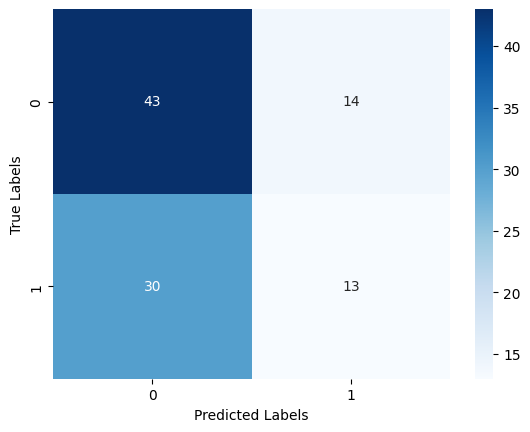

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate precision, recall and F1-score
print(classification_report(y_test, y_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Random Forest)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate negative recall
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
negative_recall = tn / (tn + fp)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Negative Recall: {negative_recall}")
print(f"F1 Score: {f1}")


Classification Accuracy: 50.0%
Precision: 0.40540540540540543
Recall: 0.3488372093023256
Negative Recall: 0.6140350877192983
F1 Score: 0.375


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Decision Tree)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")


Classification Accuracy: 50.0%


              precision    recall  f1-score   support

           0       0.56      0.61      0.58        57
           1       0.41      0.35      0.38        43

    accuracy                           0.50       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.49      0.50      0.49       100



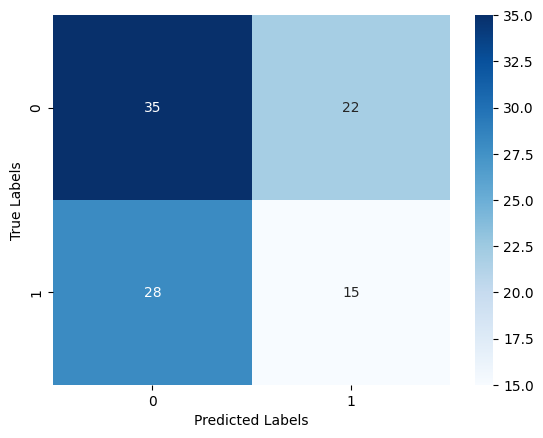

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate precision, recall and F1-score
print(classification_report(y_test, y_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Random Forest)
model = SVC(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate negative recall
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
negative_recall = tn / (tn + fp)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Negative Recall: {negative_recall}")
print(f"F1 Score: {f1}")


Classification Accuracy: 61.0%
Precision: 0.6
Recall: 0.27906976744186046
Negative Recall: 0.8596491228070176
F1 Score: 0.380952380952381


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using SVM)
model = SVC(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")

Classification Accuracy: 61.0%


              precision    recall  f1-score   support

           0       0.61      0.86      0.72        57
           1       0.60      0.28      0.38        43

    accuracy                           0.61       100
   macro avg       0.61      0.57      0.55       100
weighted avg       0.61      0.61      0.57       100



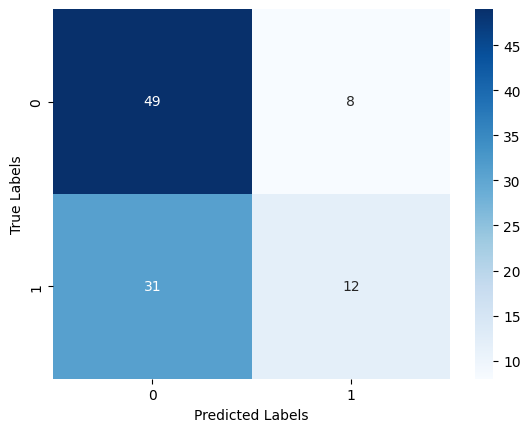

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate precision, recall and F1-score
print(classification_report(y_test, y_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Random Forest)
model = BernoulliNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate negative recall
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
negative_recall = tn / (tn + fp)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Negative Recall: {negative_recall}")
print(f"F1 Score: {f1}")


Classification Accuracy: 56.99999999999999%
Precision: 0.5
Recall: 0.46511627906976744
Negative Recall: 0.6491228070175439
F1 Score: 0.4819277108433735


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Bernoulli Naive Bayes)
model = BernoulliNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")


Classification Accuracy: 56.99999999999999%


              precision    recall  f1-score   support

           0       0.62      0.65      0.63        57
           1       0.50      0.47      0.48        43

    accuracy                           0.57       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.57      0.57      0.57       100



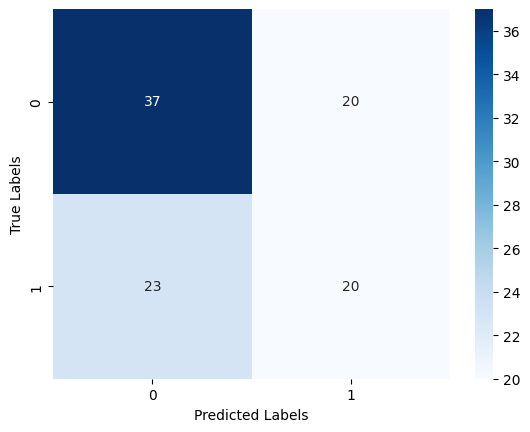

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate precision, recall and F1-score
print(classification_report(y_test, y_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Random Forest)
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate negative recall
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
negative_recall = tn / (tn + fp)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Negative Recall: {negative_recall}")
print(f"F1 Score: {f1}")


Classification Accuracy: 57.99999999999999%
Precision: 0.5185185185185185
Recall: 0.32558139534883723
Negative Recall: 0.7719298245614035
F1 Score: 0.4


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")


Classification Accuracy: 57.99999999999999%


              precision    recall  f1-score   support

           0       0.60      0.77      0.68        57
           1       0.52      0.33      0.40        43

    accuracy                           0.58       100
   macro avg       0.56      0.55      0.54       100
weighted avg       0.57      0.58      0.56       100



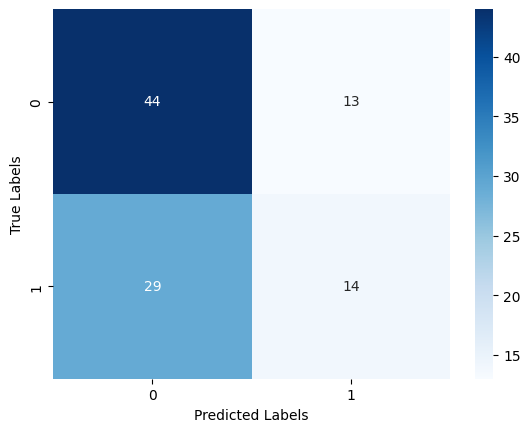

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate precision, recall and F1-score
print(classification_report(y_test, y_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Random Forest)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate negative recall
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
negative_recall = tn / (tn + fp)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Negative Recall: {negative_recall}")
print(f"F1 Score: {f1}")


Classification Accuracy: 59.0%
Precision: 0.53125
Recall: 0.3953488372093023
Negative Recall: 0.7368421052631579
F1 Score: 0.45333333333333325


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")


Classification Accuracy: 59.0%


              precision    recall  f1-score   support

           0       0.62      0.74      0.67        57
           1       0.53      0.40      0.45        43

    accuracy                           0.59       100
   macro avg       0.57      0.57      0.56       100
weighted avg       0.58      0.59      0.58       100



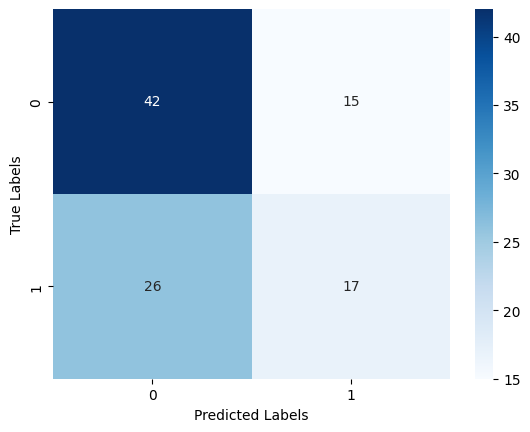

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate precision, recall and F1-score
print(classification_report(y_test, y_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# random forest
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model (using Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")


[[43 14]
 [30 13]]
Classification Accuracy: 56.00000000000001%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


[[34 23]
 [20 23]]
Classification Accuracy: 56.99999999999999%
F1 Score: 0.5168539325842696
Negative Recall: 0.5964912280701754
Precision: 0.5
Recall: 0.5348837209302325


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")


[[34 23]
 [20 23]]
Classification Accuracy: 56.99999999999999%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the negative recall (True Negative Rate)
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)
print(f"Negative Recall (TNR): {negative_recall}")

# Calculate the overall recall (Sensitivity)
overall_recall = recall_score(y_test, y_pred)
print(f"Overall Recall (Sensitivity): {overall_recall}")


[[42 15]
 [30 13]]
Negative Recall (TNR): 0.7368421052631579
Overall Recall (Sensitivity): 0.3023255813953488


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq)
X_test_pad = pad_sequences(X_test_seq, maxlen=X_train_pad.shape[1])

# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_train_pad.shape[1]),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)

# Make predictions on the test data
y_pred_probs = model.predict(X_test_pad).flatten()
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Print the validation loss and accuracy history
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Print the test loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
10/10 [==============================] - 1s 43ms/step - loss: 0.6908 - accuracy: 0.5281 - val_loss: 0.6824 - val_accuracy: 0.5750
Epoch 2/10
10/10 [==============================] - 0s 20ms/step - loss: 0.6416 - accuracy: 0.6250 - val_loss: 0.6752 - val_accuracy: 0.5750
Epoch 3/10
10/10 [==============================] - 0s 21ms/step - loss: 0.6009 - accuracy: 0.6969 - val_loss: 0.6684 - val_accuracy: 0.5875
Epoch 4/10
10/10 [==============================] - 0s 20ms/step - loss: 0.5482 - accuracy: 0.9094 - val_loss: 0.6592 - val_accuracy: 0.6250
Epoch 5/10
10/10 [==============================] - 0s 21ms/step - loss: 0.4757 - accuracy: 0.9875 - val_loss: 0.6443 - val_accuracy: 0.6125
Epoch 6/10
10/10 [==============================] - 0s 20ms/step - loss: 0.3804 - accuracy: 0.9875 - val_loss: 0.6291 - val_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 0s 20ms/step - loss: 0.2716 - accuracy: 0.9906 - val_loss: 0.6197 - val_accuracy: 0.6250
Epoch 8/10
10

              precision    recall  f1-score   support

           0       0.58      0.74      0.65        57
           1       0.46      0.30      0.37        43

    accuracy                           0.55       100
   macro avg       0.52      0.52      0.51       100
weighted avg       0.53      0.55      0.53       100

F1-Score: 0.53
Recall: 0.55


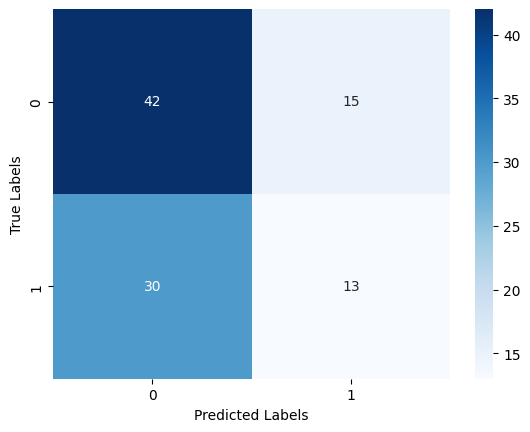

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Calculate precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.2f}")

# Calculate recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


[[42 15]
 [30 13]]
Classification Accuracy: 55.00000000000001%
F1 Score: 0.36619718309859156
Negative Recall: 0.7368421052631579
Precision: 0.4642857142857143
Recall: 0.3023255813953488


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")

Classification Accuracy: 50.0%


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


[[36 21]
 [21 22]]
Classification Accuracy: 57.99999999999999%
F1 Score: 0.5116279069767442
Negative Recall: 0.631578947368421
Precision: 0.5116279069767442
Recall: 0.5116279069767442


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")

Classification Accuracy: 59.0%


              precision    recall  f1-score   support

           0       0.62      0.63      0.63        57
           1       0.50      0.49      0.49        43

    accuracy                           0.57       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.57      0.57      0.57       100

F1-Score: 0.57
Recall: 0.57


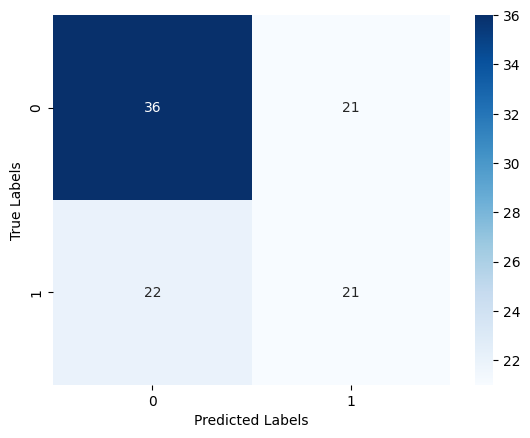

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Calculate precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.2f}")

# Calculate recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Bernoulli Naive Bayes)
model = BernoulliNB()
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


[[37 20]
 [23 20]]
Classification Accuracy: 56.99999999999999%
F1 Score: 0.4819277108433735
Negative Recall: 0.6491228070175439
Precision: 0.5
Recall: 0.46511627906976744


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Support Vector Machine)
model = SVC()
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


[[27 30]
 [18 25]]
Classification Accuracy: 52.0%
F1 Score: 0.5102040816326531
Negative Recall: 0.47368421052631576
Precision: 0.45454545454545453
Recall: 0.5813953488372093


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Decision Tree)
model = DecisionTreeClassifier()
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


[[36 21]
 [26 17]]
Classification Accuracy: 53.0%
F1 Score: 0.41975308641975306
Negative Recall: 0.631578947368421
Precision: 0.4473684210526316
Recall: 0.3953488372093023


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Vectorize the text data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train the model (using Decision Tree)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification Accuracy: {accuracy * 100}%")

[[36 21]
 [24 19]]
Classification Accuracy: 55.00000000000001%


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq)
X_test_pad = pad_sequences(X_test_seq, maxlen=X_train_pad.shape[1])

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_train_pad.shape[1]),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)

# Make predictions on the test data
y_pred_probs = model.predict(X_test_pad).flatten()
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Print the validation loss and accuracy history
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Print the test loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
10/10 [==============================] - 6s 236ms/step - loss: 0.6941 - accuracy: 0.4906 - val_loss: 0.6895 - val_accuracy: 0.6375
Epoch 2/10
10/10 [==============================] - 2s 153ms/step - loss: 0.6740 - accuracy: 0.6281 - val_loss: 0.6758 - val_accuracy: 0.6000
Epoch 3/10
10/10 [==============================] - 1s 94ms/step - loss: 0.5855 - accuracy: 0.7500 - val_loss: 0.6911 - val_accuracy: 0.6375
Epoch 4/10
10/10 [==============================] - 1s 76ms/step - loss: 0.3850 - accuracy: 0.8750 - val_loss: 0.6636 - val_accuracy: 0.6250
Epoch 5/10
10/10 [==============================] - 1s 74ms/step - loss: 0.2054 - accuracy: 0.9563 - val_loss: 0.7404 - val_accuracy: 0.5625
Epoch 6/10
10/10 [==============================] - 1s 133ms/step - loss: 0.0956 - accuracy: 0.9812 - val_loss: 1.0928 - val_accuracy: 0.6125
Epoch 7/10
10/10 [==============================] - 1s 150ms/step - loss: 0.0629 - accuracy: 0.9875 - val_loss: 0.7898 - val_accuracy: 0.6375
Epoch 8/1

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq)
X_test_pad = pad_sequences(X_test_seq, maxlen=X_train_pad.shape[1])

# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_train_pad.shape[1]),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)

# Make predictions on the test data
y_pred_probs = model.predict(X_test_pad).flatten()
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the negative recall
tn, fp, fn, tp = conf_matrix.ravel()
negative_recall = tn / (tn + fp)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Classification Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Negative Recall: {negative_recall}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Print the validation loss and accuracy history
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Print the test loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
10/10 [==============================] - 7s 269ms/step - loss: 0.6917 - accuracy: 0.5219 - val_loss: 0.6853 - val_accuracy: 0.5750
Epoch 2/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6631 - accuracy: 0.6156 - val_loss: 0.6724 - val_accuracy: 0.5750
Epoch 3/10
10/10 [==============================] - 1s 134ms/step - loss: 0.5372 - accuracy: 0.7781 - val_loss: 0.6706 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 2s 163ms/step - loss: 0.3401 - accuracy: 0.8969 - val_loss: 0.6959 - val_accuracy: 0.5750
Epoch 5/10
10/10 [==============================] - 2s 155ms/step - loss: 0.2849 - accuracy: 0.9219 - val_loss: 0.6400 - val_accuracy: 0.6625
Epoch 6/10
10/10 [==============================] - 1s 149ms/step - loss: 0.3187 - accuracy: 0.9031 - val_loss: 0.6648 - val_accuracy: 0.6250
Epoch 7/10
10/10 [==============================] - 2s 166ms/step - loss: 0.1851 - accuracy: 0.9750 - val_loss: 0.9560 - val_accuracy: 0.6250
Epoch 